In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from geopy.geocoders import Nominatim

### Cargar base de datos: 01_desastres_crudo_renamedcols.csv

In [19]:
df = pd.read_csv('../../Data/02ParaLimpiar/02desastres_definitivo.csv', delimiter=';', encoding='utf-8')
df.head(10)

,Dis No,Year,Seq,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,...,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,Total Affected,Total Damages Adj
0,1900-9002-CPV,1900,9002,Climatological,Drought,Drought,Cabo Verde,CPV,Western Africa,Africa,...,NaN,1900,NaN,NaN,1900,NaN,NaN,11000.0,NaN,NaN
1,1900-9001-IND,1900,9001,Climatological,Drought,Drought,India,IND,Southern Asia,Asia,...,NaN,1900,NaN,NaN,1900,NaN,NaN,1250000.0,NaN,NaN
2,1902-0012-GTM,1902,12,Geophysical,Earthquake,Ground movement,Guatemala,GTM,Central America,Americas,...,-91,1902,4.0,18.0,1902,4.0,18.0,2000.0,NaN,843726.0
3,1902-0003-GTM,1902,3,Geophysical,Volcanic activity,Ash fall,Guatemala,GTM,Central America,Americas,...,NaN,1902,4.0,8.0,1902,4.0,8.0,1000.0,NaN,NaN
4,1902-0010-GTM,1902,10,Geophysical,Volcanic activity,Ash fall,Guatemala,GTM,Central America,Americas,...,NaN,1902,10.0,24.0,1902,10.0,24.0,6000.0,NaN,NaN
5,1903-0006-CAN,1903,6,Geophysical,Mass movement (dry),Rockfall,Canada,CAN,Northern America,Americas,...,NaN,1903,4.0,29.0,1903,4.0,29.0,76.0,23.0,NaN
6,1903-0012-COM,1903,12,Geophysical,Volcanic activity,Ash fall,Comoros (the),COM,Eastern Africa,Africa,...,NaN,1903,NaN,NaN,1903,NaN,NaN,17.0,NaN,NaN
7,1904-0003-BGD,1904,3,Meteorological,Storm,Tropical cyclone,Bangladesh,BGD,Southern Asia,Asia,...,NaN,1904,11.0,NaN,1904,11.0,NaN,NaN,NaN,NaN
8,1905-0005-CAN,1905,5,Geophysical,Mass movement (dry),Rockfall,Canada,CAN,Northern America,Americas,...,NaN,1905,8.0,13.0,1905,8.0,13.0,18.0,18.0,NaN
9,1905-0003-IND,1905,3,Geophysical,Earthquake,Ground movement,India,IND,Southern Asia,Asia,...,76.16,1905,4.0,4.0,1905,4.0,4.0,20000.0,NaN,812477.0


## FILTRO

In [20]:
filter = df['Disaster Type'] == 'Earthquake'
df_earthquake = df[filter]

In [21]:
df_earthquake.head(2)

,Dis No,Year,Seq,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,...,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,Total Affected,Total Damages Adj
2,1902-0012-GTM,1902,12,Geophysical,Earthquake,Ground movement,Guatemala,GTM,Central America,Americas,...,-91,1902,4.0,18.0,1902,4.0,18.0,2000.0,NaN,843726.0
9,1905-0003-IND,1905,3,Geophysical,Earthquake,Ground movement,India,IND,Southern Asia,Asia,...,76.16,1905,4.0,4.0,1905,4.0,4.0,20000.0,NaN,812477.0


In [22]:
df_earthquake.shape

(1597, 26)

## AFECTADOS POR TERREMOTOS

In [23]:
df_earthquake['Total Deaths'].sum()

2398560.0

In [25]:
df_earthquake['Total Affected'].sum()

221459077.0

In [8]:
df_earthquake['No Homeless'].sum()

25358345.0

In [10]:
df_earthquake['Total Affected'].sum()

221459077.0

## Nulos

In [26]:
df_earthquake.isnull().sum()

Dis No                  0
Year                    0
Seq                     0
Disaster Subgroup       0
Disaster Type           0
Disaster Subtype        0
Country                 0
ISO                     0
Region                  0
Continent               0
Location               40
Origin               1576
Associated Dis       1255
Dis Mag Value          89
Dis Mag Scale           0
Latitude               50
Longitude              50
Start Year              0
Start Month             2
Start Day               3
End Year                0
End Month               2
End Day                 3
Total Deaths          399
Total Affected        277
Total Damages Adj     980
dtype: int64

In [12]:
df_earthquake['Country'].value_counts()

China                         203
Indonesia                     145
Iran (Islamic Republic of)    137
Turkey                        114
Japan                          70
                             ... 
Turkmenistan                    1
Serbia Montenegro               1
Burundi                         1
Dominica                        1
Wallis and Futuna               1
Name: Country, Length: 125, dtype: int64

In [28]:
df_earthquake.groupby('Country')['Total Deaths'].sum().to_frame()


,Total Deaths
Country,
Afghanistan,12622.0
Albania,626.0
Algeria,6771.0
American Samoa,34.0
Argentina,10476.0
...,...
Venezuela (Bolivarian Republic of),423.0
Wallis and Futuna,5.0
Yemen,10.0


In [29]:
a = df_earthquake.groupby('Continent')['Total Deaths'].sum().to_frame()
a

,Total Deaths
Continent,
Africa,21585.0
Americas,443261.0
Asia,1659098.0
Europe,268126.0
Oceania,6490.0


In [15]:
a = df_earthquake.groupby('Country')['Total Deaths'].value_counts()
a

Country      Total Deaths
Afghanistan  1.0             4
             5.0             3
             11.0            2
             50.0            2
             2.0             1
                            ..
Yugoslavia   12.0            1
             15.0            1
             19.0            1
             121.0           1
             1070.0          1
Name: Total Deaths, Length: 882, dtype: int64

In [33]:
df_earthquake[['Longitude', 'Latitude', 'Country']].head(50)

,Longitude,Latitude,Country
2,-91,14,Guatemala
9,76.16,32.04,India
10,71.4,33.05,Chile
11,78.46 W,1.51 N,Colombia
15,69.9,38.5,China
21,6.14,44.05,France
28,-84,9.8,Costa Rica
29,4,36,Algeria
37,101.82,-3.924,Indonesia
42,104,28,China


<Axes: xlabel='Longitude', ylabel='Latitude'>

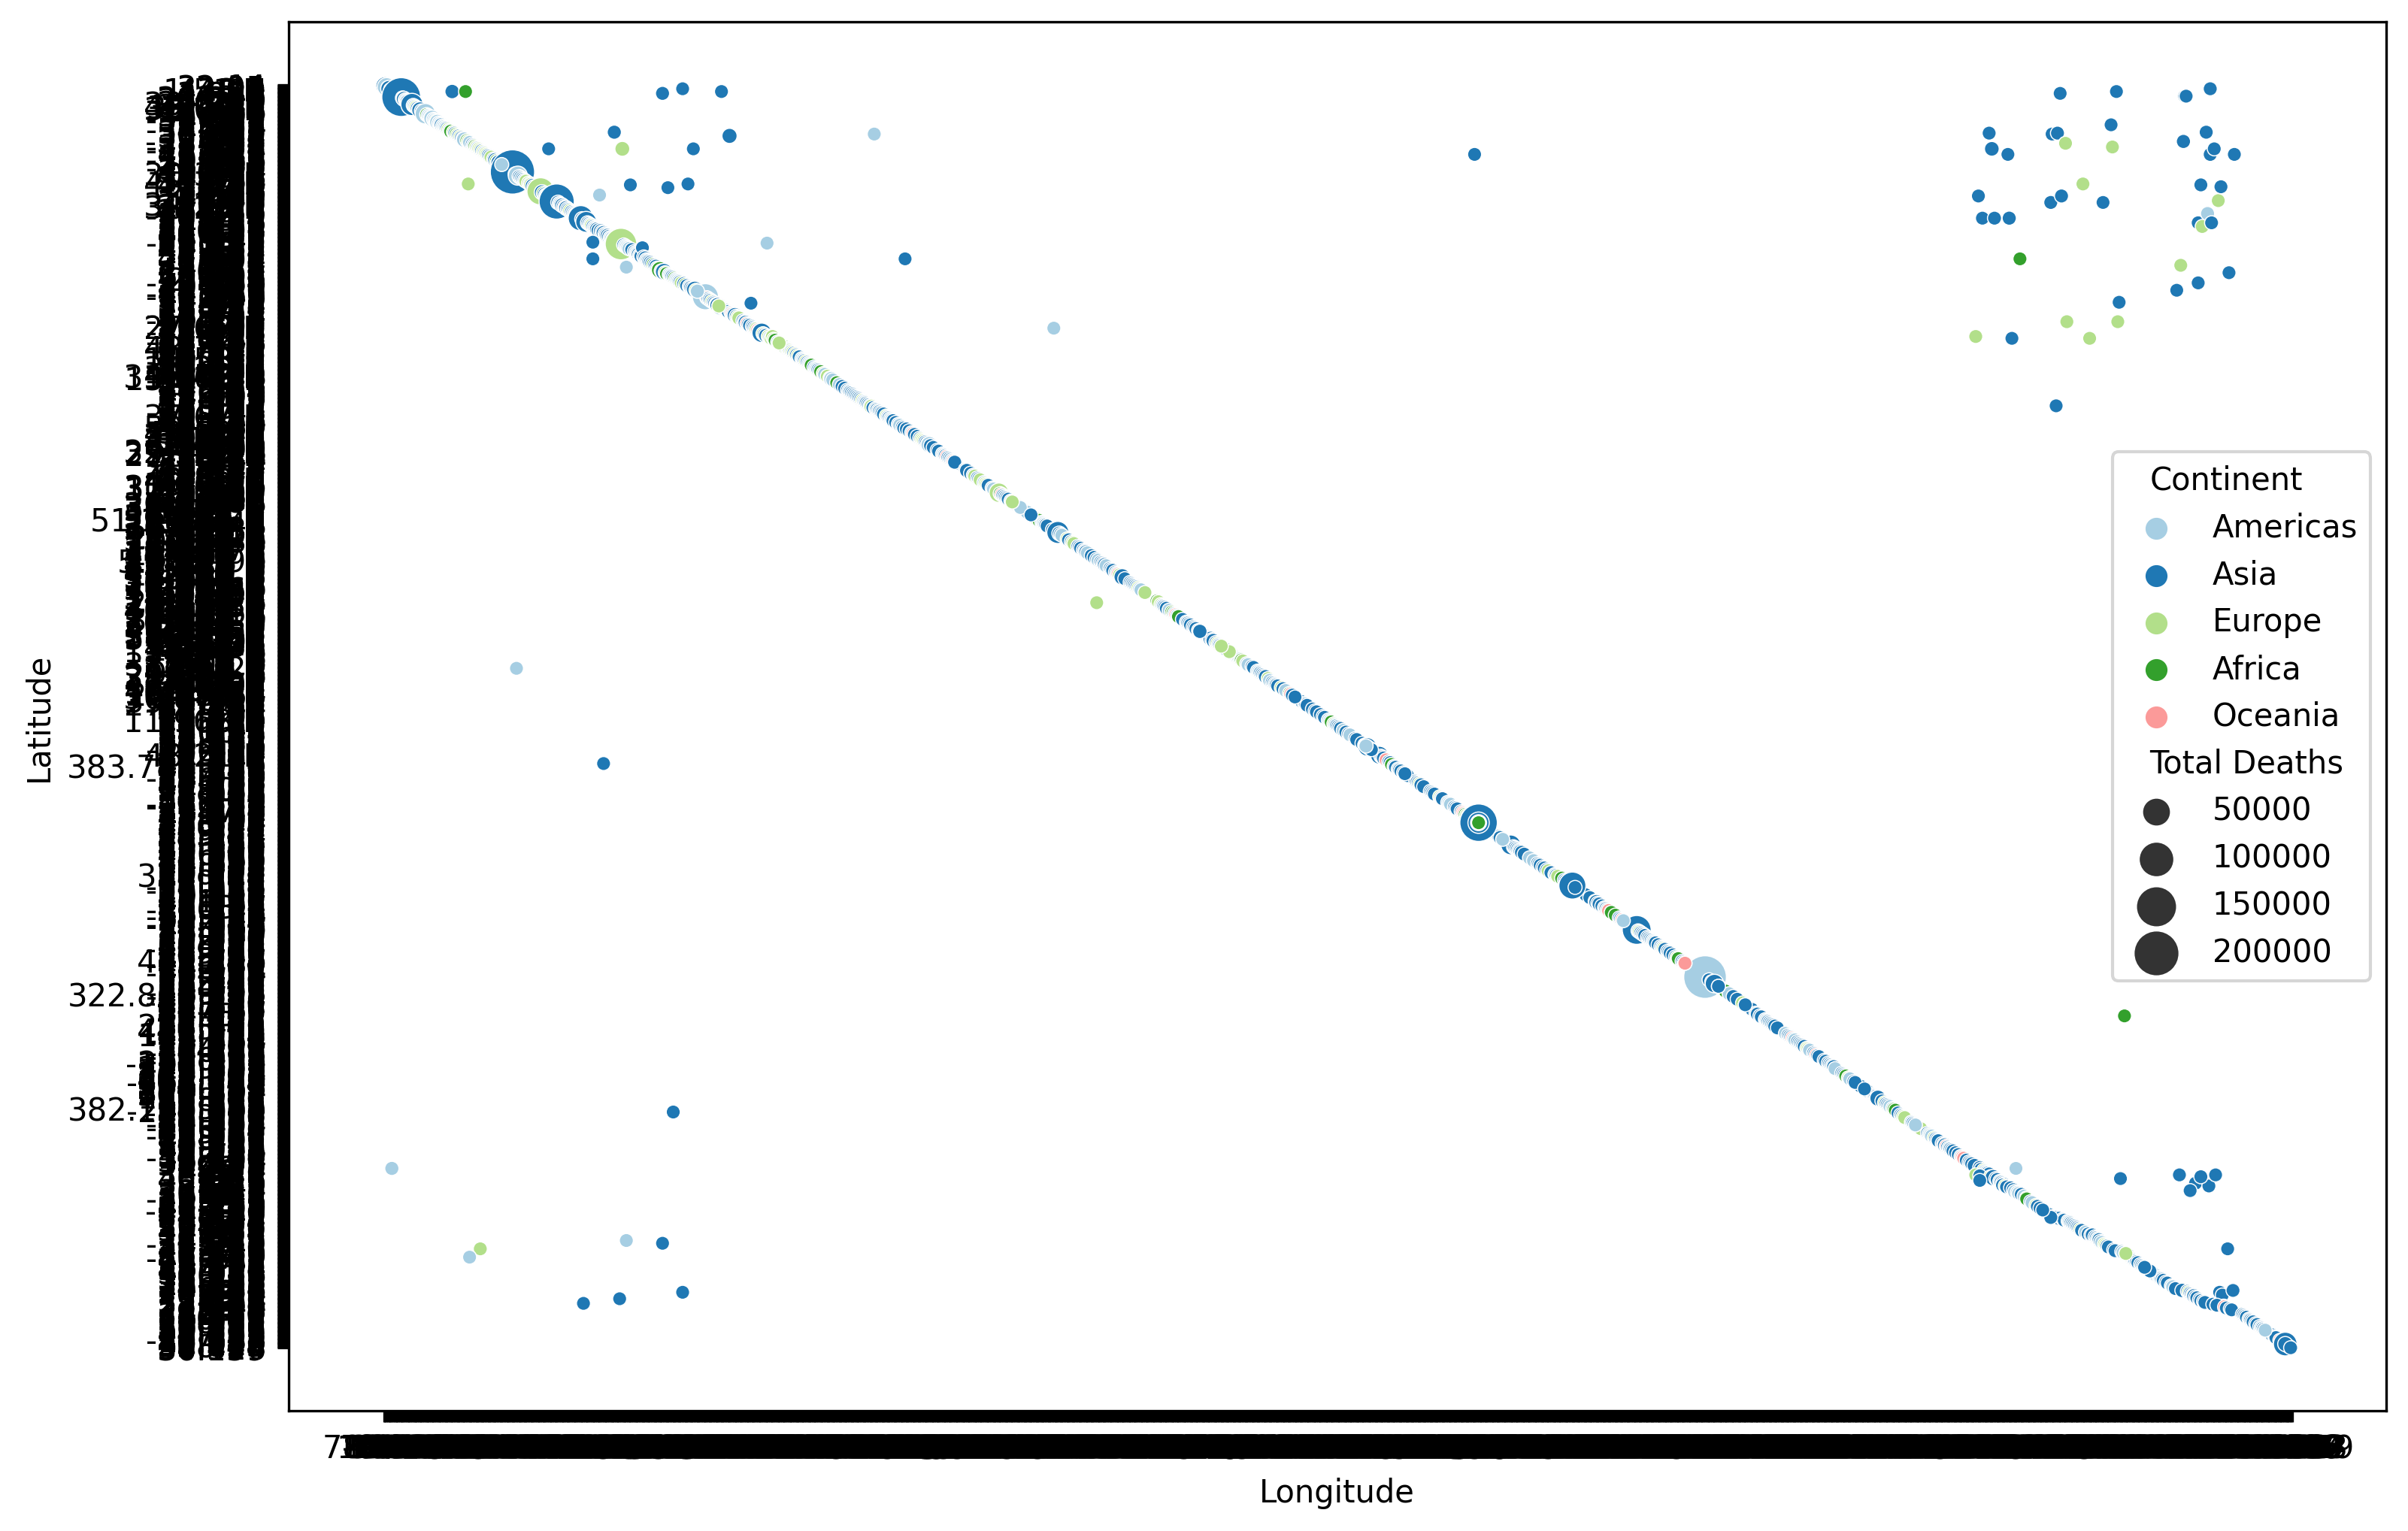

In [30]:
plt.figure(figsize=(12,8), dpi=300)
sns.scatterplot(data=df_earthquake, x='Longitude', y= 'Latitude', hue= 'Continent', palette='Paired', size='Total Deaths', sizes=(20,200))